In [1]:
from my_functions import *
import numpy as np 
import matplotlib.pyplot as plt
from constants import *
from neighbour_functions import *
from scipy.spatial import Voronoi, voronoi_plot_2d
from tqdm import tqdm
import os

### *Voronoi Plotting*

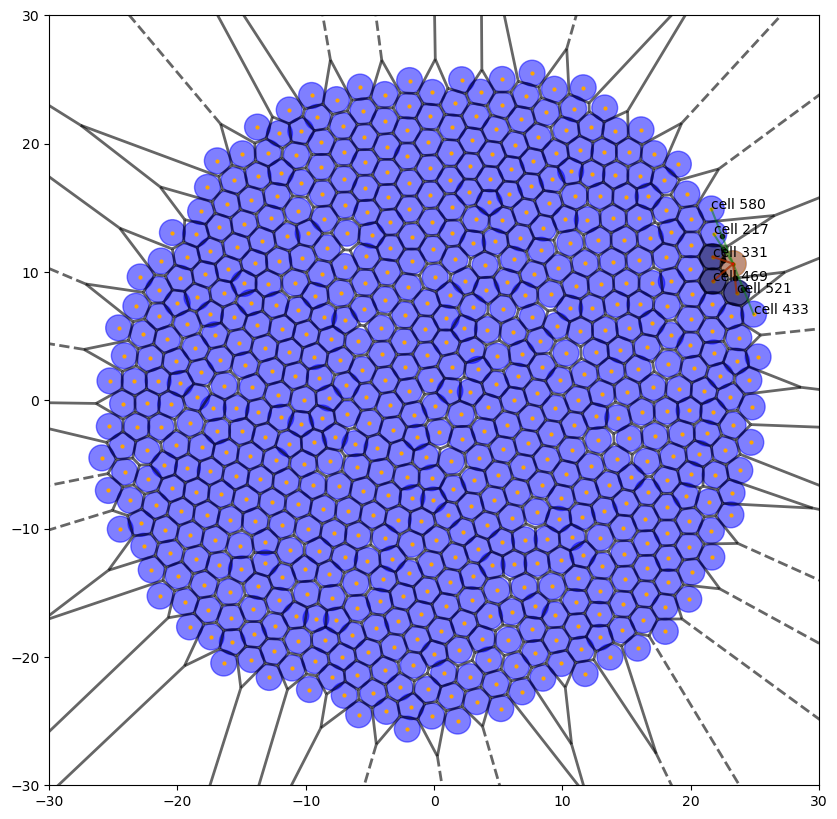

In [6]:
def plot_interaction_line(Voronoi_class, cell_index, neighbours, axis, line_color = "green"):
    """Plots both interaction line and center point between the two points"""
    
    for neighbour in neighbours:
        point1, point2 = Voronoi_class.points[cell_index], Voronoi_class.points[neighbour]
        
        #Calcs center value
        center = (point1 + point2)/2
        
        # Plots the line
        axis.plot([point1[0], point2[0]], [point1[1], point2[1]], color = line_color, alpha = 0.5)
        
        #Plots the center of the interaction line
        axis.scatter(center[0], center[1], marker="o", s = 10, color = "black", alpha = 0.8)
        axis.text(point2[0], point2[1], f"cell {neighbour}")
        
        
def plot_nearest_neighbour(Voronoi_class, cell_index, axis, line_color = "red"):
    """Plots only the nearest neighbours (The difference is very small)"""
    
    nearest_neighbours = get_nearest_neighbours(Voronoi_class.ridge_points, cell_index, Voronoi_class.points)
    
    for neighbour in nearest_neighbours: 
        point1, point2 = Voronoi_class.points[cell_index], Voronoi_class.points[neighbour]
        
        #Calcs center value
        center = (point1 + point2)/2
        
        # Plots the line
        axis.plot([point1[0], point2[0]], [point1[1], point2[1]], color = line_color, alpha = 0.5)
        
        #Plots the center of the interaction line
        axis.scatter(center[0], center[1], marker="o", s = 10, color = "black", alpha = 0.8)
  
  
def show_cell_neighbours(cell_index, vor, axis, color = "black"):
    """Shows the neighbours of a cell"""
    #Plotting the main cell:
    point = vor.points[cell_index]
    circle = plt.Circle((point[0], point[1]), r_cell, color = "orange", alpha = 0.5)
    axis.scatter(point[0], point[1], marker="o", s = 4, color = "black")
    axis.add_patch(circle)
    
    
    # Plotting the interaction lines and nearest neighbours
    neighbours = get_interacting_neighbors(vor.ridge_points, cell_index)
    plot_interaction_line(vor, cell_index, neighbours, axis)
    plot_nearest_neighbour(vor, cell_index, axis)
    
    # Highlighting the nearest neighbours
    nearest_neighbours = get_nearest_neighbours(vor.ridge_points, cell_index, vor.points)
    for neighbour in nearest_neighbours:
        point = vor.points[neighbour]
        circle = plt.Circle((point[0], point[1]), r_cell, color = color, alpha = 0.4)
        axis.add_patch(circle)
        
                

# Loads the steady state from the interaction_force
steady_state = load_points("SteadyState_625cells_600s_R_25.txt")  
vor = Voronoi(steady_state)
        
### Actually Plotting ###
fig, axis = plt.subplots(figsize=(10, 10))
screen_size = (-30, 30)

# Generates the voronoi diagram
voronoi_plot_2d(vor, axis, show_vertices=False, line_colors='black', line_width=2, line_alpha=0.6, point_size=0)

for i, point in enumerate(steady_state):
    # Plots circles
    circle = plt.Circle((point[0], point[1]), r_cell, color = "blue", alpha = 0.5)
    axis.add_patch(circle)
    
    # Plots points
    axis.scatter(point[0], point[1], marker="o", s = 4, label = f"{i}", color = "orange")
    
# Plots the vertices    
#axis.scatter(vor.vertices[:, 0], vor.vertices[:, 1], marker="x", color = "black", label = "Vertices")
  
# #Plots the interaction lines for Nearest neighbours and center points
# for cell_index in tqdm(range(len(vor.points))):
#     plot_nearest_neighbour(vor, cell_index, axis)

# Check 50 interactionen
show_cell_neighbours(50, vor, axis)

axis.set_xlim(screen_size)
axis.set_ylim(screen_size);
axis.set_aspect('equal')

In [3]:
# # Printing changes in neighbours and nearest neighbours
cell = 50
#for cell in range(len(vor.points)):   
neighbours = get_interacting_neighbors(vor.ridge_points, cell)
nearest_neighbours = get_nearest_neighbours(vor.ridge_points, cell, vor.points)
print(f"For cell {cell} is neighbour the same; {nearest_neighbours == neighbours}, Neighbours : {neighbours} , {nearest_neighbours}")

For cell 50 is neighbour the same; [], Neighbours : [] , []


5.0
5.0


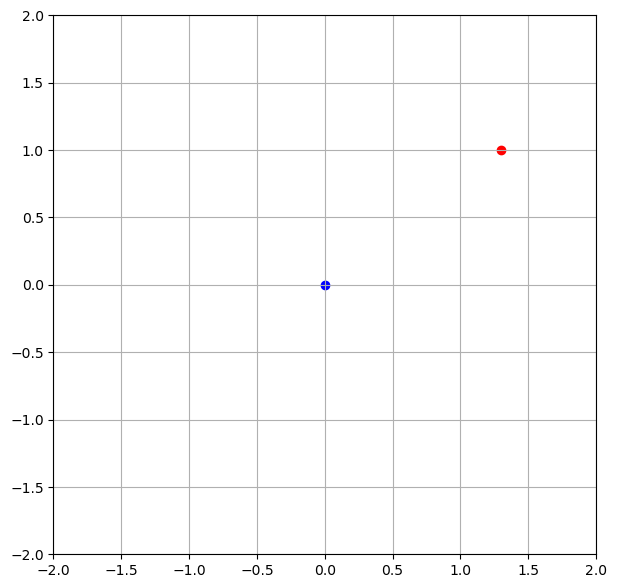

In [4]:
# print(get_interacting_neighbors(vor.ridge_points, 50))
# print(get_nearest_neighbours(vor.ridge_points, 50, vor.points))


# Checking norm calculation
point1 = np.array([1.3, 1])
point2 = np.array([0, 0])
point3 = np.array([3, 4])
print(np.linalg.norm(point2-point3))
print(np.linalg.norm([point2, point3]))

fig, axis = plt.subplots(figsize=(7, 7))
axis.scatter(point1[0], point1[1], marker="o", color = "red")
axis.scatter(point2[0], point2[1], marker="o", color = "blue")
axis.set_xlim(-2, 2)
axis.set_ylim(-2, 2)
axis.grid(True)